In [1]:
import os, copy
import numpy as np
import matplotlib.pyplot as plt
from bionlp.util import io, func, plot


MON = True
fmt = 'pdf'
%matplotlib inline

DATA_PATH = '../../data/bioevent/bnlpst/bb2016/ent-pred-100epoch/'
his_paths = ['ent%i/vecentnet_clf_%i_histories.pkl' % (i, i) for i in range(2)]
# his_labels = ['Bacteria','Location']
his_labels = ['Bacteria-VecEntNet','Location-VecEntNet']

histories = [io.read_obj(os.path.join(DATA_PATH, fpath)) for fpath in his_paths]

DATA_PATH = '../../data/bioevent/bnlpst/bb2016/evnt-pred-100epoch/'
his_paths = ['vecomnet_clf_histories.pkl']
his_labels += ['Lives_In-VeComNet']

histories += [io.read_obj(os.path.join(DATA_PATH, fpath)) for fpath in his_paths]



# DATA_PATH = '../../data/bioevent/bnlpst/bgi2011-100epoch/'
# his_paths = ['ent%i/vecentnet_clf_%i_histories.pkl' % (i, i) for i in range(11)]
# his_labels = ['Action', 'Agent', 'Entity', 'Gene', 'Member', 'Promoter', 'Protein', 'Regulon', 'Site', 'Target', 'Transcription']

# DATA_PATH = '../../data/bioevent/bnlpst/bgi2011/evnt-pred-100epoch/'
# his_paths = ['%i/vecomnet_clf_histories.pkl' % i for i in range(10)]
# his_labels = ['ActionTarget', 'BindTo', 'Interaction', 'PromoterDependence', 'PromoterOf', 'RegulonDependence', 'RegulonMember', 'SiteOf', 'TranscriptionBy', 'TranscriptionFrom']

# histories = [io.read_obj(os.path.join(DATA_PATH, fpath)) for fpath in his_paths]

In [2]:
# metrics = [['acc', 'val_acc'], ['loss', 'val_loss'], ['mean_squared_error', 'val_mean_squared_error']]
# mtrc_labels = ['Train', 'Test']
# line_styles = ['-', '--']
metrics = [['acc'], ['loss'], ['mean_squared_error']]
mtrc_labels = ['train']
line_styles = ['-']
ylabels = ['Accuracy', 'Loss', 'Mean Squared Error']
lgnd_locs = ['lower right', 'upper right', 'upper right']
titles = ['Model Accuracy', 'Model Loss', 'Mean Squared Error'] if MON else ['', '', '']

In [3]:
data = []
for history in histories:
    res = copy.deepcopy(history[0])
    for i in range(1, len(history)):
        for k, v in res.iteritems():
            res[k].extend(history[i][k])
    data.append(res)

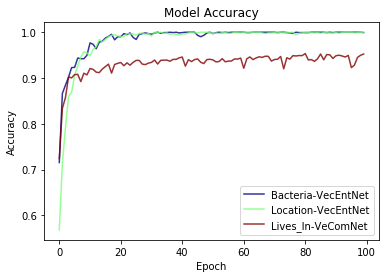

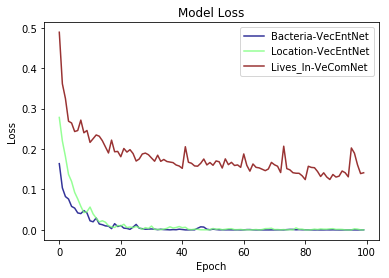

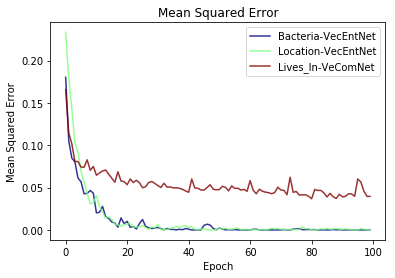

In [4]:
colors, alphas = plot.gen_colors(len(data), cm='jet')
for mtrc, ylabel, lgnd_loc, title in zip(metrics, ylabels, lgnd_locs, titles):
#     sub_data = [x[m] for x in data for m in mtrc]
    legends = []
    for i, x, lb in zip(range(len(data)), data, his_labels):
        for m, m_lb, ls in zip(mtrc, mtrc_labels, line_styles):
            plt.plot(x[m], color=colors[i], alpha=alphas[i], ls=ls)
#             legends.append('%s-%s' % (lb, m_lb))
            legends.append('%s' % lb)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(legends, loc=lgnd_loc, ncol=1, prop={'size':10})
    if (MON):
        plt.show()
    else:
        plt.savefig(ylabel+'.%s'%fmt, format=fmt)
    plt.close()